Found image: https://live.staticflickr.com/65535/53112820204_a1015c4e02_m.jpg


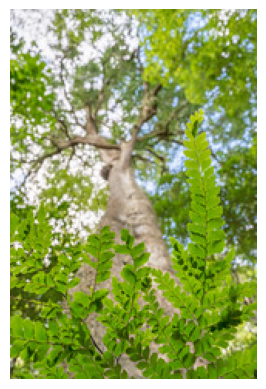

In [9]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import ollama

# --- 1. HELPER: GET IMAGE ---
def get_and_show_plant_image(scientific_name):
    """Downloads an image, shows it, and RETURNS the data for AI to use."""
    
    # Flickr Open API
    url = "https://www.flickr.com/services/feeds/photos_public.gne"
    params = {
        "format": "json",
        "nojsoncallback": 1,
        "tags": scientific_name.replace(" ", "_")
    }

    try:
        resp = requests.get(url, params=params, timeout=10)
        data = resp.json()
    except:
        print("Failed to load image feed.")
        return None

    items = data.get("items", [])
    if not items:
        print("No images found for:", scientific_name)
        return None

    image_url = items[0]["media"]["m"]
    print("Found image:", image_url)

    # Download the image
    img_resp = requests.get(image_url)
    img_data = img_resp.content # This is the raw bytes
    
    # Display it for you to see
    img = Image.open(BytesIO(img_data))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    
    return img_data

plant_name = "Adiantum trapeziforme" 

# Step A: Get the image AND save the data to a variable
img_data = get_and_show_plant_image(plant_name)

Found image: https://live.staticflickr.com/65535/53388650015_349f9246df_m.jpg


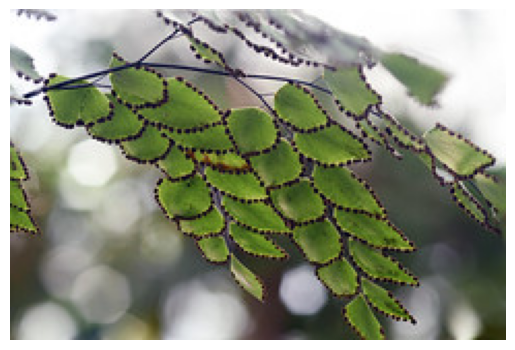

✨ Generating riddle for: Adiantum peruvianum...

📜 RIDDLE:
I'm a fern with delicate might,
My fronds are divided, a wondrous sight.
I thrive in the shade, with moist air to spare,
A Peruvian gem, with beauty to share.

🤖 AI is analyzing the photo for: Adiantum peruvianum...
✅ VERIFICATION RESULT: No.


In [4]:
def verify_plant_match(target_name, image_bytes):
    print(f"🤖 AI is analyzing the photo for: {target_name}...")
    response = ollama.chat(
        model='llama3.2-vision',
        messages=[{
            'role': 'user',
            'content': f"Does this image show a plant called '{target_name}'? Answer only YES or NO.",
            'images': [image_bytes]
        }]
    )
    return response['message']['content']

def create_riddle(plant_name):
    print(f"✨ Generating riddle for: {plant_name}...")
    response = ollama.chat(
        model='llama3.2-vision', # Using vision model for text (works fine)
        messages=[{
            'role': 'user',
            'content': f"Write a short, rhyming riddle for a plant called '{plant_name}'. Do not say the name '{plant_name}' in the riddle."
        }]
    )
    return response['message']['content']

# --- 3. MAIN TEST LOGIC ---

plant_name = "Adiantum peruvianum" 

# Step A: Get the image AND save the data to a variable
img_data = get_and_show_plant_image(plant_name)

# Step B: Only run AI if we actually got an image
if img_data:
    # Test Riddle
    riddle = create_riddle(plant_name)
    print(f"\n📜 RIDDLE:\n{riddle}\n")

    # Test Verification
    result = verify_plant_match(plant_name, img_data)
    print(f"✅ VERIFICATION RESULT: {result}")
else:
    print("❌ Could not run test because no image was found.")